In [23]:
import micropolarray as ml
import numpy as np

# Image initialization

In [24]:
micropolimage_from_file = ml.MicropolImage("./tests/image.fits")

micropolimage_from_nparray = ml.MicropolImage(np.ones(shape=(16, 16)))

image = ml.MicropolImage(micropolimage_from_nparray)


# Plotting

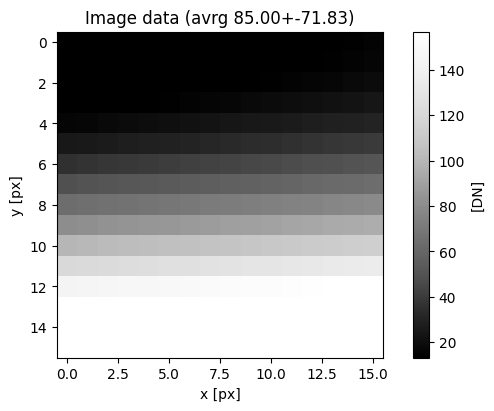

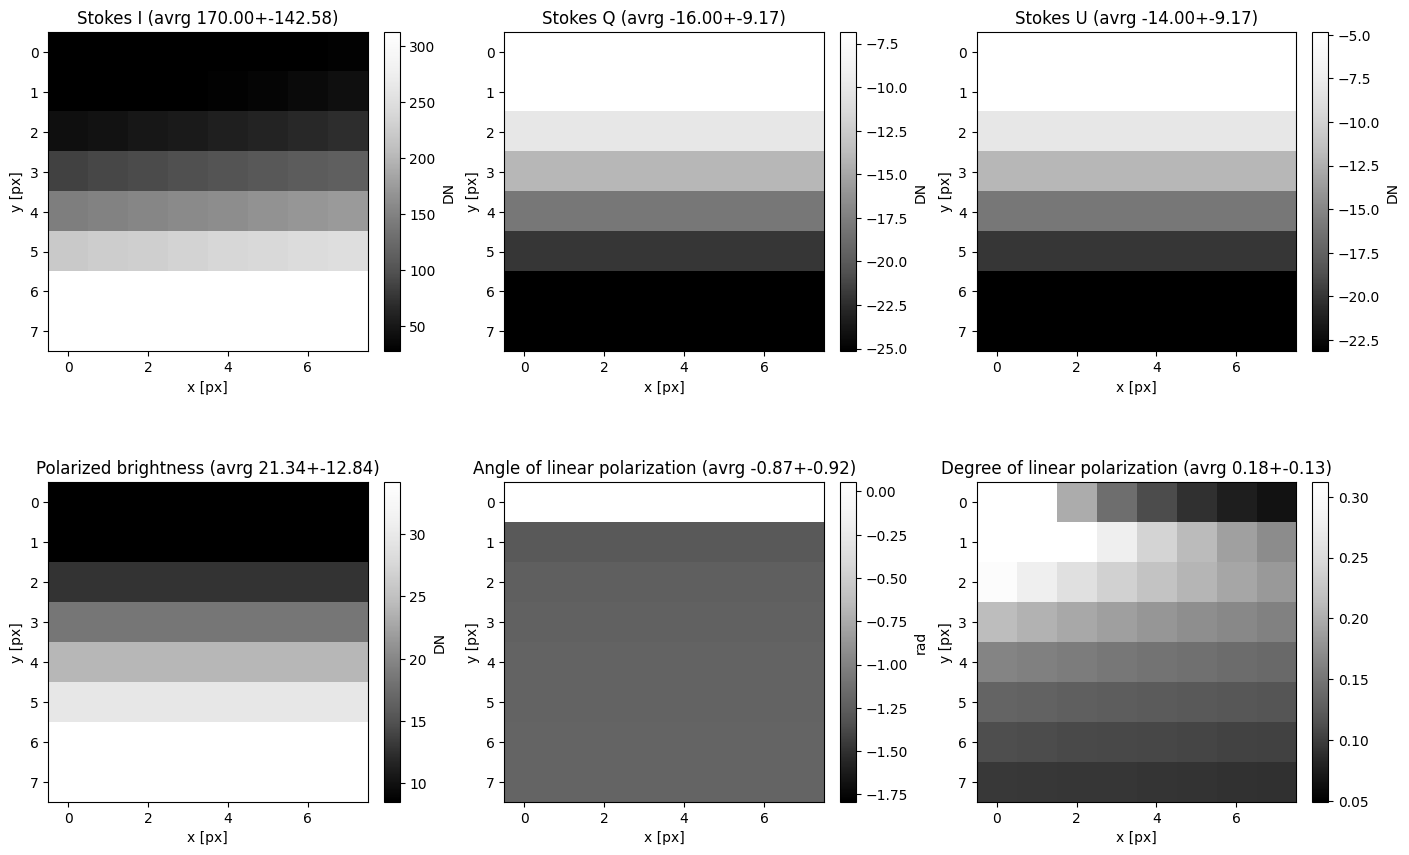

In [25]:
fig_1, ax_1, fig_2, ax_2 = micropolimage_from_file.show_with_pol_params()
# output are matplotlib figures/axes
fig_1.set_dpi(100)
fig_2.set_dpi(100)

# Retrieve polarization informations

In [26]:
image = (
    micropolimage_from_file + micropolimage_from_nparray + 1
)  # operations are possible

print(image.header)  # print header information

angle_of_linear_pol = image.AoLP.data  # 8x8 linear pol angle
print(np.mean(angle_of_linear_pol))

(
    Stokes_I,
    Stokes_Q,
    Stokes_U,
) = image.Stokes_vec  # Get the stokes vector components as np.ndarray
print(Stokes_I)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16                                                  NAXIS2  =                   16                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# Rebin, demosaic, demodulate

INFO - 2023-09-21 16:39:54,387 - Demosaicing (adjacent method)...


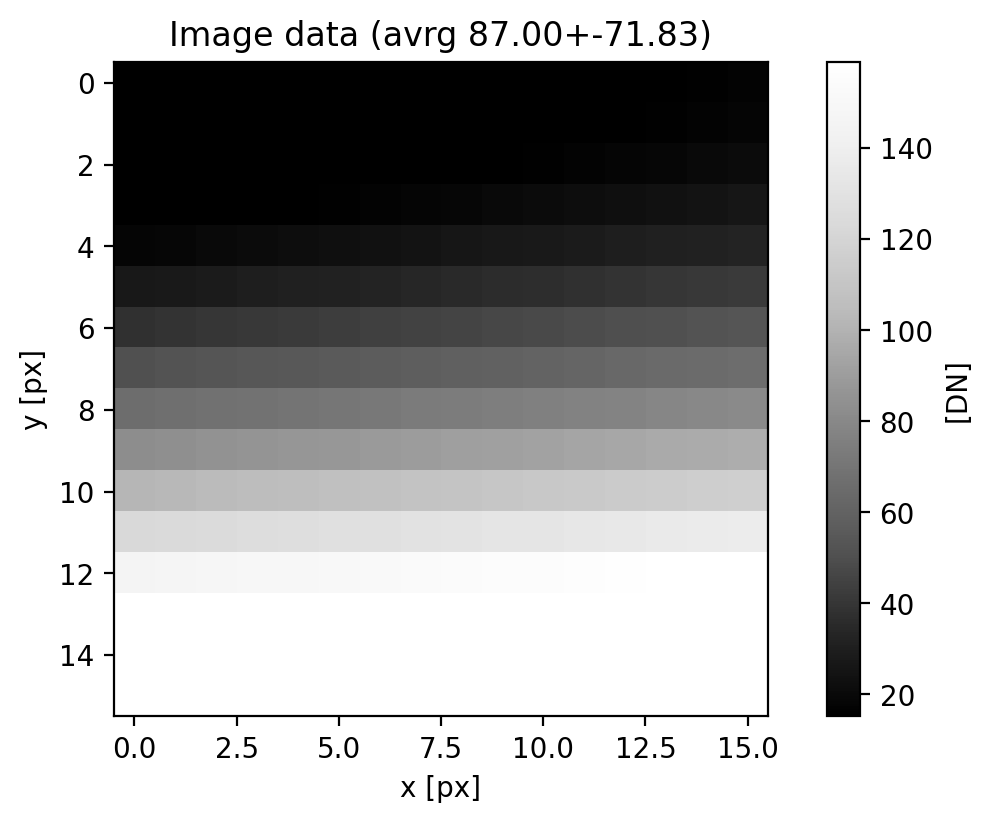

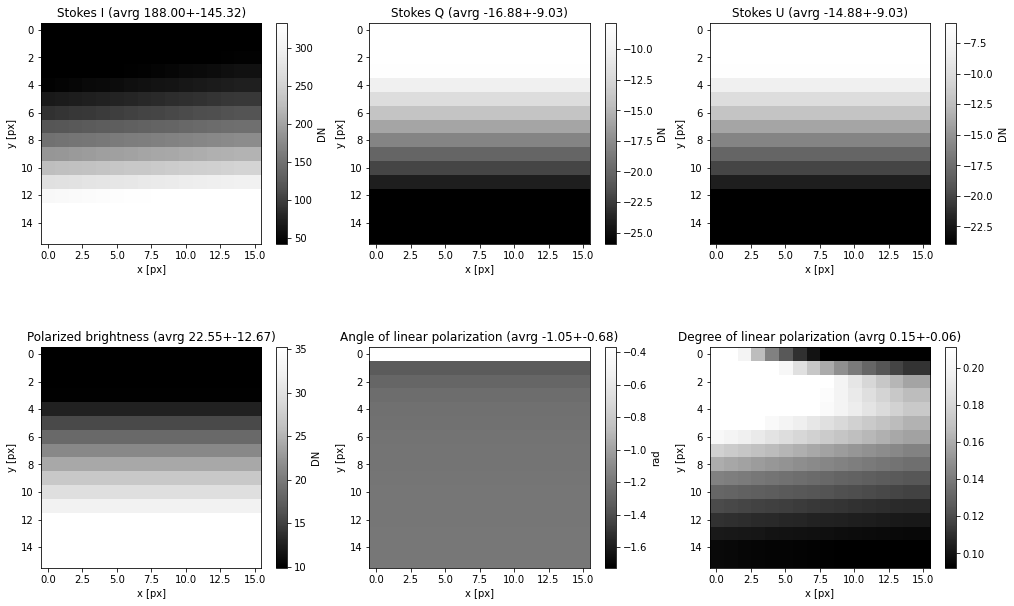

In [27]:
binned_image = image.rebin(binning=2)  # 2x2 binning: (16,16) -> (8,8) data

demosaiced_image = image.demosaic()  # parameters now are (16, 16) arrays
fig, ax, fig2, ax2 = demosaiced_image.show_with_pol_params()

# example of demodulation if demodulation matrices are available
# demodulator_object = ml.Demodulator("put/demodulation/folder/here")
# demodulated_image = image.demodulate(demodulator=demodulator_object)
